In [233]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
import scipy.io as sc

#### Data

In [234]:
data = sc.loadmat('digits.mat')
Y = data['y']
X = data['X']
print("Y shape:\t", Y.shape)
print("Class labels:\t", np.unique(Y))
print("X shape:\t", X.shape)
print("X[0] shape:\t", X[0].shape)

Y shape:	 (5000, 1)
Class labels:	 [ 1  2  3  4  5  6  7  8  9 10]
X shape:	 (5000, 400)
X[0] shape:	 (400,)


#### Data visualization

In [235]:
def displayData(i):
    plt.imshow(np.reshape(X[i*500], (20,20)).T, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("The current digit is " + str(i))

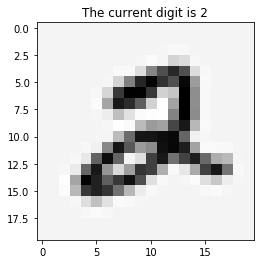

In [236]:
digit = 2
displayData(digit)

#### Hypothesis and cost fucntions

In [237]:
def h(z):
    return 1.0 / (1.0 + np.exp(-z))

def cost_function(x, y, w):
    w = np.matrix(w)
    z = x * w.T
    return (-y.T * np.log(h(z)) - (1-y.T) * np.log(1-h(z))).sum()

W = np.zeros(400)
cost_function(X, Y, W)

-85257.10320887493

#### Gradient descent algorithm

In [238]:
def gradient_descent(x, y, w, lr):
    w = np.matrix(w)
    z = h(x * w.T) - y
    N = len(y)
    
    grad = ((x.T * z) / N).T - ((lr / N) * w)
    grad[0,0] = np.sum(np.multiply(z, x[:,0])) / N

    return np.array(grad)

gradient_descent(X, Y, W, 0.005)

array([[ 0.00000000e+00,  0.00000000e+00, -7.74530186e-08,
         3.19876600e-06,  1.89536237e-05, -7.06376094e-04,
        -8.97395355e-04, -3.72741263e-04, -1.10787541e-04,
        -1.37049401e-04, -4.11905416e-05,  3.09307938e-05,
         7.56273049e-05,  1.66101324e-04,  1.88959823e-04,
         1.11618541e-04,  3.44740605e-05,  2.31849497e-07,
        -3.65944989e-07,  0.00000000e+00, -2.71480120e-07,
         2.68348312e-06,  1.35802658e-06,  5.10971729e-05,
         9.29459372e-05, -1.13518367e-03, -4.04630781e-03,
        -5.65616107e-03, -4.38249876e-03, -1.22936584e-03,
         1.06402725e-03,  1.67724463e-03,  1.83122226e-03,
         1.41359436e-03,  1.00669534e-03,  6.22600175e-04,
         2.88468971e-04,  1.69300222e-04,  4.53328568e-05,
         1.64277642e-05,  2.32894093e-06, -2.61429416e-05,
         6.07579192e-05, -2.68789968e-04, -2.19152610e-03,
        -1.11673884e-02, -2.41869621e-02, -3.12963830e-02,
        -2.35164217e-02, -1.04915336e-02, -4.58342103e-0

#### One vs all classification

#### Calculate accuracy